# Pandas Tutorial

In [1]:
import pandas as pd

In [2]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

## The Basic Pandas Datatypes

The most common datatypes used in Pandas are the **Series** and **DataFrame** types. The **Index** type is also important, but not directly used by us as the users in most of the cases. 

### Pandas Series

Pandas **Series** is a one-dimensional **labeled** array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the **index**. 

#### Creating Serieses

The basic method to create a Series is to call:

In [3]:
data, index = [1, 2, 3], ['A','B','C']
s = pd.Series(data, index=index)
s

A    1
B    2
C    3
dtype: int64

Another option of creating a Series object is by passing a dictionray instead of two seperate arrays for the data and the index part.  
In that case, the dictionary keys will serve as the index, while the values will serve as the data:

In [4]:
s = pd.Series({'A': 1, 'B': 2, 'C': 3})
s

A    1
B    2
C    3
dtype: int64

To breakdown a Series back to data and index array (or list), we can:

In [5]:
s.values, s.values.tolist()

(array([1, 2, 3]), [1, 2, 3])

In [6]:
s.index, s.index.tolist()

(Index(['A', 'B', 'C'], dtype='object'), ['A', 'B', 'C'])

Note that a Series always has an implied integer like index:

In [7]:
s[0]

1

For more info, visit the official documantion at https://pandas.pydata.org/docs/user_guide/dsintro.html

#### Vectorized operations and label alignment with Series

Operations between Series automatically align the data based on label. Thus, you can write computations without giving consideration to whether the Series involved have the same labels:

In [8]:
s + s

A    2
B    4
C    6
dtype: int64

In [9]:
other_s = pd.Series({'A': 1, 'B': 2, 'C': 3, 'D': 4})
other_s

A    1
B    2
C    3
D    4
dtype: int64

In [10]:
s + other_s

A    2.0
B    4.0
C    6.0
D    NaN
dtype: float64

**Note**: The result of an operation between unaligned Series will have the union of the indexes involved. If a label is not found in one Series or the other, the result will be marked as missing NaN. Being able to write code without doing any explicit data alignment grants immense freedom and flexibility in interactive data analysis and research.

**More operations:**

In [11]:
s - other_s

A    0.0
B    0.0
C    0.0
D    NaN
dtype: float64

In [12]:
s / other_s

A    1.0
B    1.0
C    1.0
D    NaN
dtype: float64

In [13]:
s * other_s

A    1.0
B    4.0
C    9.0
D    NaN
dtype: float64

Logical AND:

In [14]:
s & other_s

A     True
B     True
C     True
D    False
dtype: bool

Logical OR:

In [15]:
s | other_s

A     True
B     True
C     True
D    False
dtype: bool

etc. 

#### Name attribute

Series can also have a name attribute:

In [16]:
s = pd.Series(data, name="some_name")
s

0    1
1    2
2    3
Name: some_name, dtype: int64

In [17]:
s.name

'some_name'

The Series name will be assigned automatically in many cases, in particular when taking 1D slices of DataFrame as you will see next. To rename:

In [18]:
s = s.rename("different_name")
s.name

'different_name'

#### Series transformation

In many cases we would like to transform the values of a column or a row in a manner that is not supported by the regular transformation functions. In those cases, we will typically use the `.apply()` function.

The `.apply()` method in Pandas Series is used to apply a function to each element of the Series. It takes a function as an argument and returns a new Series with the function applied to each element of the original Series.

The .apply() method is useful when you want to transform the values in a Series using a custom function or apply a built-in function that is not already available in the Series object.

In [19]:
s + 1

0    2
1    3
2    4
Name: different_name, dtype: int64

In [20]:
s.apply(lambda e: e + 1)

0    2
1    3
2    4
Name: different_name, dtype: int64

Let's try to apply a more complicated transformation

In [21]:
s.apply(lambda e: 'Yes' if e >= 3 else 'No')

0     No
1     No
2    Yes
Name: different_name, dtype: object

An alternative to the .apply() method is the .map() method. The .map() method applies a function to each value of the Series but it is usually used for element-wise operations like mapping the values of a categorical variable to numeric values or for dictionary-like lookup of values.

In [22]:
s.map({1:'a', 2:'b'})

0      a
1      b
2    NaN
Name: different_name, dtype: object

### The DataFrame Object

DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object.  
Like Series, DataFrame accepts many different kinds of input:
* Dict of 1D ndarrays, lists, dicts, or Series
* 2-D numpy.ndarray
* Structured or record ndarray
* A Series
* Another DataFrame

Along with the data, you can optionally pass index (row labels) and columns (column labels) arguments. 

#### Creating DataFrames

**Creating a dataframe from a lists of data, columns and index:**

In [23]:
data = [[1,2,3], # data row one (Note we have 3 columns)
        [4, 5,6]] # data row two. 
columns = ['col_1','col_2','col_3']
index = ['row_index_1', 'row_index_2']

In [24]:
pd.DataFrame(data)

,0,1,2
0,1,2,3
1,4,5,6


In [25]:
pd.DataFrame(data, columns = columns)

,col_1,col_2,col_3
0,1,2,3
1,4,5,6


In [26]:
df = pd.DataFrame(data=data, index=index, columns=columns)
df

,col_1,col_2,col_3
row_index_1,1,2,3
row_index_2,4,5,6


**Note**:
* It is common to name DataFrames by `df` or with a `df` suffix, e.g. `age_df`, `names_df` etc.
* when printing a dataframe, the columns and index will be bolded, while the data would not. This helps understanding the structure of a dataframe just from looking at it with commands like `df.head()` etc.


**Creating a dataframe from a "regular" dictionary:** 

Perhaps the most convinient method of creating a dataframe is by passing a dictionary. With a dictionary, unlike the case of the Series consturctor, the keys will serve as columns and the values as the data.  
The index will be generated automatically by pandas to a simple RangeIndex, i.e. integer numbers from 0 to the number of rows passed.

In [27]:
d = {"one": [1.0, 2.0, 3.0, 4.0], "two": [4.0, 3.0, 2.0, 1.0]}

In [28]:
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


**Creating a dataframe from a dictionary of Series:**

In [29]:
s1 = pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"])
s2 = pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"])

In [30]:
s2

a    1.0
b    2.0
c    3.0
d    4.0
dtype: float64

In [31]:
d = {"one": s1, "two": s2}

In [32]:
pd.DataFrame(d)

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


**Note** In this case, since the each series has an index, the resulted dataframe has index as well. 

**Creating a dataframe From a dict of tuples**:

Also very common case of creating a dataframe is from a list of tuples. Those serve as the data. We will need to supply columns and indexes if needed, otherwise a defualt range columns and indexes will be auto-created:

In [33]:
data = []
for i in range(2,10):
    for j in range(1,5):
        data.append((i, j, i*j))

In [34]:
data[:5]

[(2, 1, 2), (2, 2, 4), (2, 3, 6), (2, 4, 8), (3, 1, 3)]

In [35]:
pd.DataFrame(data).head()

,0,1,2
0,2,1,2
1,2,2,4
2,2,3,6
3,2,4,8
4,3,1,3


In [36]:
pd.DataFrame(data, columns=['I','J','I_times_J']).head()

,I,J,I_times_J
0,2,1,2
1,2,2,4
2,2,3,6
3,2,4,8
4,3,1,3


In [37]:
df = pd.DataFrame(data, columns=['I','J','I_times_J'], index=[f'row_{i}' for i in range(len(data))])
df.head()

,I,J,I_times_J
row_0,2,1,2
row_1,2,2,4
row_2,2,3,6
row_3,2,4,8
row_4,3,1,3


Read more about DataFrames here: https://pandas.pydata.org/docs/user_guide/dsintro.html#dataframe

#### Dataframe Transformation

The `.apply()` method in Pandas DataFrame is used to apply a function along either axis of the DataFrame, i.e., row-wise or column-wise. By default, it applies the function column-wise.

When used with `axis=0`, it applies the function to each column of the DataFrame, and when used with `axis=1`, it applies the function to each row of the DataFrame. The output of the function can be a scalar value, a Series or a DataFrame, depending on the function applied.

The `.apply()` method is useful when you want to transform the data in a DataFrame using a custom function or apply a built-in function that is not already available in the DataFrame object.

In [38]:
df.head()

,I,J,I_times_J
row_0,2,1,2
row_1,2,2,4
row_2,2,3,6
row_3,2,4,8
row_4,3,1,3


We will usually not apply the same function to every column, so the next illustration is possible, but very rare:

In [39]:
df.apply(lambda column: column + 5).head()

,I,J,I_times_J
row_0,7,6,7
row_1,7,7,9
row_2,7,8,11
row_3,7,9,13
row_4,8,6,8


The more frequent use of `.apply()` on a dataframe object is when we want to operate on the rows. The most common row operation is deciding weather or not a row is meeting a certain critiria:

In [40]:
df.head()

,I,J,I_times_J
row_0,2,1,2
row_1,2,2,4
row_2,2,3,6
row_3,2,4,8
row_4,3,1,3


In [41]:
def is_sum_values_in_row_greater_then_x(row, x):
    return row.sum() > x

In [42]:
df.apply(lambda row: is_sum_values_in_row_greater_then_x(row, 10), axis=1).head()

row_0    False
row_1    False
row_2     True
row_3     True
row_4    False
dtype: bool

An alternative to the `.apply()` method is the `.applymap()` method. The `.applymap()` method applies a function to each element of the DataFrame, rather than row- or column-wise, which makes it ideal for element-wise operations.

In [43]:
df.applymap(lambda e: e / 2).head()

,I,J,I_times_J
row_0,1.0,0.5,1.0
row_1,1.0,1.0,2.0
row_2,1.0,1.5,3.0
row_3,1.0,2.0,4.0
row_4,1.5,0.5,1.5


### The relation between DataFrame and Series Objects

The result of selecting one row or a column from a dataframe is a Series Object. Thus it is helpful to think about DataFrames as being composed of multiple Series objects:

In [44]:
print(df['I_times_J'].head())
print(f"\nThe type of col_1 is: {type(df['I_times_J'])}")

row_0    2
row_1    4
row_2    6
row_3    8
row_4    3
Name: I_times_J, dtype: int64

The type of col_1 is: <class 'pandas.core.series.Series'>


In [45]:
print(df.loc['row_0'])
print(f"\nThe type of row_0 is: {type(df.loc['row_0'])}")

I            2
J            1
I_times_J    2
Name: row_0, dtype: int64

The type of row_0 is: <class 'pandas.core.series.Series'>


## Loading files into DataFrames

As mentioned, most of the time we will load data from files, in which case we will mostly need to modify the data, columns or index instead of creating them from scratch. The most common data loading function is `pd.read_csv()`, but other files are supported as well, see the full list here: https://pandas.pydata.org/docs/user_guide/io.html.  
Also, read more about the full power of the `pd.read_csv()` function here: https://pandas.pydata.org/docs/user_guide/io.html#csv-text-files.  
Below is an example of the common usage:

In [46]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'    
chipo_df = pd.read_csv(url, sep='\t')
chipo_df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


**Note**: 
* Reading directly from urls, S3 buckets and local files is supported. 
* You can specificy the delimiter. Here we've loaded a TSV file and not a CSV, so we had to mark `sep='\t'` to succesfuly parse the file into a dataframe.
* The index was set automatically by pandas to be a running, RangeIndex.

### Loading from clipboard

Another cool and very useful functionality is creating dataframes from data on your clipboard. For example, open a raw CSV file on your browser by visiting [this link](https://raw.githubusercontent.com/edoson/Python-ML---Lesson-1/main/data/crypto_buy_sell_logs.csv). 

Us Control+A and Control + C to copy all data. Now, run `pd.read_clipboard()` in the code cell below.

In [47]:
#pd.read_clipboard(sep=',').head()

## DataFrame modifications

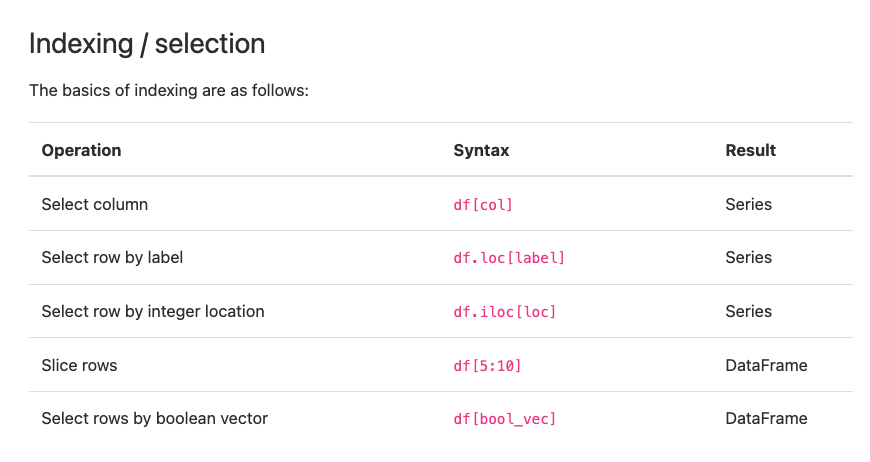

### Column renaming, selection, addition, deletion¶

You can treat a DataFrame semantically like a dict of like-indexed Series objects. Getting, setting, and deleting columns works with the same syntax as the analogous dict operations:

#### Selection

In [48]:
df = pd.DataFrame({"one": [1, 2, 3], "two": [4, 5, 6], 'three': [7,8,9]})
df

,one,two,three
0,1,4,7
1,2,5,8
2,3,6,9


In [49]:
df['one']

0    1
1    2
2    3
Name: one, dtype: int64

Use the property notation (`.`) works as well and is more convientient:

In [50]:
df.one

0    1
1    2
2    3
Name: one, dtype: int64

#### Selection of multiple columns

Like in numpy, we can use a list to select multiple columns:

In [51]:
df[['one','two']]

,one,two
0,1,4
1,2,5
2,3,6


#### Assignment (New columns)

To assign, use the dict syntax, the property notation only works with exsiting colmuns, not new ones:

In [52]:
df['three'] = df.one * df.two
df

,one,two,three
0,1,4,4
1,2,5,10
2,3,6,18


In [53]:
df["flag"] = df["one"] > 2
df

,one,two,three,flag
0,1,4,4,False
1,2,5,10,False
2,3,6,18,True


You can assign scalar values as well, in which case the entire column will have one value:

In [54]:
df["four"] = 4
df

,one,two,three,flag,four
0,1,4,4,False,4
1,2,5,10,False,4
2,3,6,18,True,4


#### Assignment with `assign()`

Another **important** method of assigning new columns is with the `assign()` methdod, which allows to chain several columns creation and use existing columns:

In [55]:
df.assign(five=lambda x: x.one + 5) \
  .assign(six=6) \
  .assign(seven = lambda x: x.six + 1)

,one,two,three,flag,four,five,six,seven
0,1,4,4,False,4,6,6,7
1,2,5,10,False,4,7,6,7
2,3,6,18,True,4,8,6,7


#### Rename 

To rename one or more columns, use the `.rename()` functionallity:

In [56]:
df.rename(columns={'one':'col_one', 'two': 'col_two'}).head()

,col_one,col_two,three,flag,four
0,1,4,4,False,4
1,2,5,10,False,4
2,3,6,18,True,4


#### Deletion

The most convienient method to remove columns is using the `.drop()` functionallity:

In [57]:
df.drop(columns = ['one','two'])

,three,flag,four
0,4,False,4
1,10,False,4
2,18,True,4


You could also just select the columns of interest to a new dataframe:

In [58]:
cols_of_interest = [c for c in df.columns if c not in ['one','two']]
new_df = df[cols_of_interest]
new_df

,three,flag,four
0,4,False,4
1,10,False,4
2,18,True,4


You can achieve the same result in a one-liner

In [59]:
new_df = df[[c for c in df.columns if c not in ['one','two']]]
new_df

,three,flag,four
0,4,False,4
1,10,False,4
2,18,True,4


### Selection of rows

#### Selecting directly from the index

In some cases we would like to access a specific row directly. We can do it using the row identifier and `.loc` or using the row number using `.iloc`. When selecting one row, the returned object would be a Series. When selecting multiple rows, the returned object would be a dataframe.

Like Series, a dataframe has two indexes:
* The explicit one defined by the user and visible when plotting the dataframe 
* An implicit running integer one, holding the integer position of each row (i.e. first row, second row, etc.)

Use the `.loc` attribute to select rows from the explicit dataframe index, and use `.iloc` to select from the implicit, int-like index: 

In [60]:
df = pd.DataFrame(data, 
                  columns=['I','J','I_times_J'], 
                  index=[f'row_{i}' for i in range(len(data))]).head(10)
df

,I,J,I_times_J
row_0,2,1,2
row_1,2,2,4
row_2,2,3,6
row_3,2,4,8
row_4,3,1,3
row_5,3,2,6
row_6,3,3,9
row_7,3,4,12
row_8,4,1,4
row_9,4,2,8


In [61]:
df.iloc[0]

I            2
J            1
I_times_J    2
Name: row_0, dtype: int64

In [62]:
df.iloc[[0,1]]

,I,J,I_times_J
row_0,2,1,2
row_1,2,2,4


In [63]:
df.loc['row_0']

I            2
J            1
I_times_J    2
Name: row_0, dtype: int64

In [64]:
df.loc[['row_0', 'row_1']]

,I,J,I_times_J
row_0,2,1,2
row_1,2,2,4


#### Basic conditional row selection 

The most common rows selection use case is when we will select rows based on some conditions on the data. There are several method to achieve this, depending on the complexity of the condition we want to apply. 
The slightly less common selection method is retrieving a row by its index directly. 

Suppose we want to select all the rows in which column J is greater than 2.  
**Option 1 - Using the [] operator**

In [65]:
df[df.J > 2]

,I,J,I_times_J
row_2,2,3,6
row_3,2,4,8
row_6,3,3,9
row_7,3,4,12


**Note**: 
* This is a two step operation. First, the condition inside the [] returns a True/False Series for each row. Then, only the True columns are being selected. 
* This is the most general conditinal selection method which will  allow us to create some very complicated conditonal selections. 

**Option 2 - using the `.query()` functinallity:** 

In [66]:
df.query('J > 2')

,I,J,I_times_J
row_2,2,3,6
row_3,2,4,8
row_6,3,3,9
row_7,3,4,12


What if we want all the rows in which column J is greater than 2 and column I_times_J is greater than 10?

One option is to create a mask - a mask is a series which has the same index as the dataframe, and boolean values. We can create a mask be doing boolean operations on the dataframe columns. for example:

In [67]:
mask = (df.J > 2) & (df.I_times_J > 10)
df[mask]

,I,J,I_times_J
row_7,3,4,12


In [68]:
df.query('J > 2 and I_times_J > 10')

,I,J,I_times_J
row_7,3,4,12


## Dealing with missing values

### NaN and None in Pandas

When creating a dataframe, we can specificy a missing value by using Python's `None` object or Numpy's `NaN` object.  
``NaN`` and ``None`` both have their place, and Pandas is built to handle the two of them nearly interchangeably, converting between them where appropriate:

In [69]:
import numpy as np
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

### Tools to handle missing data

#### Detecting Null values

Pandas provides several methods to deal with missing values in a DataFrame or Series. Here are some of the most commonly used methods:

1. `.isnull()` and `.notnull()` methods: These methods return a Boolean mask indicating whether each value in the DataFrame or Series is missing or not missing. They are useful for selecting or filtering missing values.

In [70]:
df = pd.DataFrame({'A': [1, 2, None, 4, None], 'B': [5, None, 7, 8, None]})
df

,A,B
0,1.0,5.0
1,2.0,NaN
2,NaN,7.0
3,4.0,8.0
4,NaN,NaN


In [71]:
display('df.isnull()', 'df.notnull()')

,A,B
0,False,False
1,False,True
2,True,False
3,False,False
4,True,True
,A,B
0,True,True
1,True,False
2,False,True
3,True,True


#### Dropping Null values

2. `.dropna()` method: This method drops the rows or columns that contain missing values. By default, it drops any row that contains at least one missing value.

In [72]:
df.dropna()

,A,B
0,1.0,5.0
3,4.0,8.0


In [73]:
df.dropna(how='all')

,A,B
0,1.0,5.0
1,2.0,NaN
2,NaN,7.0
3,4.0,8.0


#### Replacing Null values

3. `.fillna()` method: This method fills missing values with a specified value or method. It can be used to replace missing values with a constant value, the mean or median of the non-missing values, or the last valid observation.


In [74]:
df.fillna(10)

,A,B
0,1.0,5.0
1,2.0,10.0
2,10.0,7.0
3,4.0,8.0
4,10.0,10.0


In [75]:
df.fillna(method='pad')

,A,B
0,1.0,5.0
1,2.0,5.0
2,2.0,7.0
3,4.0,8.0
4,4.0,8.0


#### Interpolating Null values

4. `.interpolate()` method: This method fills missing values with interpolated values. It can be used to estimate the missing values based on the values of the neighboring data points.

In [76]:
df.interpolate()

,A,B
0,1.0,5.0
1,2.0,6.0
2,3.0,7.0
3,4.0,8.0
4,4.0,8.0


## Data Analysis

### Exploration

When first looking at a new dataset, we usually will need to explore the data and meta data, answering questions like:
* How many rows are in the dataset? How many columns? 
* What is the unique identifier of each row (semantic index)? is it a value of one column or mulitple columns? 
* Are there any missing values? in which columns? 
* What are the data types or special formatting features presented in the data? Do we need to transform/normalize values for easier processing? 
* Etc.

To answer those questions, we would like to see a summary of the data + a pick at the values, from the begining, end and at random. Use:
* `df.shape` to see how many rows and columns you have in the dataset.
* `df.info` to see the names of columns, index type, and how many missing values in each colmun.
* `df.head()` to look at the top 5 rows of the data
* `df.tail()` to look at the last 5 rows of the data
* `df.sample(n)` to look at a random n rows of the data (very effective)

In [77]:
chipo_df.shape

(4622, 5)

In [78]:
chipo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [79]:
chipo_df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [80]:
chipo_df.tail()

,order_id,quantity,item_name,choice_description,item_price
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


In [81]:
chipo_df.sample(5)

,order_id,quantity,item_name,choice_description,item_price
3617,1449,2,Veggie Bowl,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",$16.98
1889,762,1,Bottled Water,NaN,$1.50
1905,769,1,Chips and Fresh Tomato Salsa,NaN,$2.39
2235,901,4,Canned Soda,[Sprite],$4.36
3483,1399,1,Canned Soft Drink,[Sprite],$1.25


To find how rows are being stored, i.e. what's the unique/semantic index of each row, you'll need to further explore the data using methods like:
* `df.value_counts()`, `df.unique()`, `df.nunique()` to further understand uniqness of values in each column
* `df.duplicated()` and `df.drop_duplicates()` to find and remove duplicated entries, when needed. 

For example, lets try to figure out what is the uniqueness in each row of the chipotle dataset. It seems reasonable to believe that the column order_id should be the unique index, as now two orders should have the same id. Let's see if that's indeed the case:

In [82]:
chipo_df.order_id.value_counts().head()

926     23
1483    14
205     12
759     11
1786    11
Name: order_id, dtype: int64

So we see that's not the case, which means we still don't really understand our data and how it is constructed. Let's continue exploring:

In [83]:
chipo_df.duplicated().sum()

59

We have 59 duplicated rows. let's see them:

In [84]:
chipo_df[chipo_df.duplicated(keep=False)].sort_values(by='order_id')

,order_id,quantity,item_name,choice_description,item_price
234,103,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Rice, Black Beans...",$11.75
238,103,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Rice, Black Beans...",$11.75
246,108,1,Canned Soda,[Mountain Dew],$1.09
248,108,1,Canned Soda,[Mountain Dew],$1.09
296,129,1,Steak Burrito,"[Tomatillo Green Chili Salsa, [Rice, Cheese, G...",$11.75
...,...,...,...,...,...
4544,1806,1,Bottled Water,NaN,$1.50
4568,1817,1,Bottled Water,NaN,$1.50
4570,1817,1,Bottled Water,NaN,$1.50
4602,1827,1,Barbacoa Burrito,[Tomatillo Green Chili Salsa],$9.25


Ok, so will removing the duplicated rows leave as with a dataframe that have 1 row per order id? 

In [85]:
chipo_df = chipo_df.drop_duplicates().copy()
chipo_df.order_id.value_counts().head()

926     21
1483    14
1786    11
759     11
691     11
Name: order_id, dtype: int64

The answer is no. Let's look at the order id with the most ammount of rows to understand what's unique about the rows:

In [86]:
chipo_df.query('order_id == 926')

,order_id,quantity,item_name,choice_description,item_price
2304,926,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Lettuce]]",$9.25
2305,926,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$8.75
2306,926,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$8.75
2308,926,1,Steak Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Lettu...",$9.25
2309,926,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",$8.75
2310,926,1,Steak Burrito,"[Roasted Chili Corn Salsa, [Rice, Cheese, Sour...",$9.25
2311,926,1,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",$8.75
2312,926,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce]]",$8.75
2313,926,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream...",$8.75
2314,926,1,Chicken Salad Bowl,"[Roasted Chili Corn Salsa, [Rice, Sour Cream]]",$8.75


In [87]:
chipo_df.loc[2305].choice_description

'[Roasted Chili Corn Salsa, [Fajita Vegetables, Rice, Cheese, Sour Cream, Lettuce]]'

In [88]:
chipo_df.loc[2306].choice_description

'[Roasted Chili Corn Salsa, [Fajita Vegetables, Rice, Cheese, Sour Cream]]'

So we now understand that a row is unique by the following combination of attributes: **<order_id, item_name, choice_description>**

### Sorting 

To sort the dataframe, use `df.sort_values(by=)` with or without the `ascending=` parametrs: 

In [89]:
chipo_df.sort_values(by='item_price', ascending=False).head()

,order_id,quantity,item_name,choice_description,item_price
2600,1032,1,Steak Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$9.39
1418,576,1,Barbacoa Salad Bowl,[Roasted Chili Corn Salsa],$9.39
3356,1346,1,Barbacoa Salad Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",$9.39
4419,1762,1,Steak Salad Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$9.39
1825,738,1,Barbacoa Salad Bowl,"[Fresh Tomato Salsa, [Rice, Pinto Beans, Chees...",$9.39


In [90]:
chipo_df.sort_values(by=['order_id', 'item_name'], ascending=[True, False]).head()

,order_id,quantity,item_name,choice_description,item_price
2,1,1,Nantucket Nectar,[Apple],$3.39
1,1,1,Izze,[Clementine],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Descriptive statistics and summarizing data

To understand the distribution of values withing each column, use `df.colname.value_counts()` for categrocial data, `df.colname.describe()` for a stat summary of a float column and a `df.colname.quantile()` for a specific quantile inspection:

In [91]:
chipo_df.item_name.value_counts().head()

Chicken Bowl           717
Chicken Burrito        546
Chips and Guacamole    474
Steak Burrito          365
Canned Soft Drink      290
Name: item_name, dtype: int64

In [92]:
chipo_df['item_price_fixed'] = chipo_df.item_price.apply(lambda x: float(x[1:]))
chipo_df['item_price_fixed'].describe()

count    4563.000000
mean        7.490083
std         4.244155
min         1.090000
25%         3.750000
50%         8.750000
75%         9.250000
max        44.250000
Name: item_price_fixed, dtype: float64

In [93]:
chipo_df['item_price_fixed'].quantile(0.95)

11.75

## Group-Apply-Combine

Group-apply-combine is a very successfull data transformation paradigm used in Pandas in a very intuitive way. Read more about it from the docs [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html). From the docs:

By “group by” we are referring to a process involving one or more of the following steps:
* Splitting the data into groups based on some criteria.
* Applying a function to each group independently.
* Combining the results into a data structure.



Out of these, the split step is the most straightforward. In fact, in many situations we may wish to split the data set into groups and do something with those groups. In the apply step, we might wish to do one of the following:

* Aggregation: compute a summary statistic (or statistics) for each group. Some examples:
  * Compute group sums or means.
  * Compute group sizes / counts.

* Transformation: perform some group-specific computations and return a like-indexed object. Some examples:
  * Standardize data (zscore) within a group.
  * Filling NAs within groups with a value derived from each group.

* Filtration: discard some groups, according to a group-wise computation that evaluates True or False. Some examples:
  * Discard data that belongs to groups with only a few members.
  * Filter out data based on the group sum or mean.

Some combination of the above: GroupBy will examine the results of the apply step and try to return a sensibly combined result if it doesn’t fit into either of the above two categories.



The metdhod we will use here are:
* `df.groupby([])` for the grouping phase
* `.apply()` or `.agg()` or `.transform()` or other for the apply phase
* The combine stage will be done automatically by pandas, hopefully returning a valid dataframe object which we can further work on.

In [94]:
grouped_by_item_name = chipo_df.groupby('item_name')
grouped_by_item_name.ngroups

50

In [95]:
chipo_df.item_name.nunique()

50

In [96]:
grouped_by_item_name.size().sort_values(ascending=False).head()

item_name
Chicken Bowl           717
Chicken Burrito        546
Chips and Guacamole    474
Steak Burrito          365
Canned Soft Drink      290
dtype: int64

In [97]:
chipo_df.item_name.value_counts().head()

Chicken Bowl           717
Chicken Burrito        546
Chips and Guacamole    474
Steak Burrito          365
Canned Soft Drink      290
Name: item_name, dtype: int64

Did items changed price in the dataset? We can access a group column without explicitly calling `.apply()`:

In [98]:
grouped_by_item_name.item_name.nunique().max()

1

When we need to make some more complex computation, we will need to use `.apply()` and write our custom logic. We need to pass a function to `.apply()`, which will take the group (dataframe object) and return the desired output. 

## Combaining dataframes - Concat and append

### Simple Concatenation with ``pd.concat``

Pandas has a function, ``pd.concat()``, which has a similar syntax to ``np.concatenate`` but contains a number of options that we'll discuss momentarily. ``pd.concat()`` can be used for a simple concatenation of ``Series`` or ``DataFrame`` objects, just as ``np.concatenate()`` can be used for simple concatenations of arrays:

In [99]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

It also works to concatenate higher-dimensional objects, such as ``DataFrame``s:

In [100]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

In [101]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
display('df1', 'df2', 'pd.concat([df1, df2])')

,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


By default, the concatenation takes place row-wise within the ``DataFrame`` (i.e., ``axis=0``).
Like ``np.concatenate``, ``pd.concat`` allows specification of an axis along which concatenation will take place.
Consider the following example:

In [102]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
display('df3', 'df4', "pd.concat([df3, df4], axis='columns')")

df3
    A   B
0  A0  B0
1  A1  B1

df4
    C   D
0  C0  D0
1  C1  D1

pd.concat([df3, df4], axis='columns')
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1

We could have equivalently specified ``axis=1``; here we've used the more intuitive ``axis='col'``. 

#### Duplicate indices

One important difference between ``np.concatenate`` and ``pd.concat`` is that Pandas concatenation *preserves indices*, even if the result will have duplicate indices!
Consider this simple example:

In [103]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index  # make duplicate indices!
display('x', 'y', 'pd.concat([x, y])')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


Notice the repeated indices in the result.
While this is valid within ``DataFrame``s, the outcome is often undesirable.
``pd.concat()`` gives us a few ways to handle it.

##### Catching the repeats as an error

If you'd like to simply verify that the indices in the result of ``pd.concat()`` do not overlap, you can specify the ``verify_integrity`` flag.
With this set to True, the concatenation will raise an exception if there are duplicate indices.
Here is an example, where for clarity we'll catch and print the error message:

In [126]:
try:
    pd.concat([x, y], verify_integrity=True)
except Exception as e:
    print(f'Exception while trying to concate dataframes. Exception is:\n{e}')

Exception while trying to concate dataframes. Exception is:
Indexes have overlapping values: Int64Index([0, 1], dtype='int64')


##### Ignoring the index

Sometimes the index itself does not matter, and you would prefer it to simply be ignored.
This option can be specified using the ``ignore_index`` flag.
With this set to true, the concatenation will create a new integer index for the resulting ``Series``:

In [107]:
display('x', 'y', 'pd.concat([x, y], ignore_index=True)')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


### The ``append()`` method

Because direct array concatenation is so common, ``Series`` and ``DataFrame`` objects have an ``append`` method that can accomplish the same thing in fewer keystrokes.
For example, rather than calling ``pd.concat([df1, df2])``, you can simply call ``df1.append(df2)``:

In [108]:
display('df1', 'df2', 'df1.append(df2)')

,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


Keep in mind that unlike the ``append()`` and ``extend()`` methods of Python lists, the ``append()`` method in Pandas does not modify the original object–instead it creates a new object with the combined data.
It also is not a very efficient method, because it involves creation of a new index *and* data buffer.
Thus, if you plan to do multiple ``append`` operations, it is generally better to build a list of ``DataFrame``s and pass them all at once to the ``concat()`` function.

## Merges and joins

### Relational Algebra

The behavior implemented in ``pd.merge()`` is a subset of what is known as *relational algebra*, which is a formal set of rules for manipulating relational data, and forms the conceptual foundation of operations available in most databases.
The strength of the relational algebra approach is that it proposes several primitive operations, which become the building blocks of more complicated operations on any dataset.
With this lexicon of fundamental operations implemented efficiently in a database or other program, a wide range of fairly complicated composite operations can be performed.

Pandas implements several of these fundamental building-blocks in the ``pd.merge()`` function and the related ``join()`` method of ``Series`` and ``Dataframe``s.
As we will see, these let you efficiently link data from different sources.

The following picture captures the potential ways in which tow sets can be combined

![alt_text](https://www.metabase.com/learn/images/sql-join-types/join-types.png)

## Categories of Joins

The ``pd.merge()`` function implements a number of types of joins: the *one-to-one*, *many-to-one*, and *many-to-many* joins.
All three types of joins are accessed via an identical call to the ``pd.merge()`` interface; the type of join performed depends on the form of the input data.
Here we will show simple examples of the three types of merges, and discuss detailed options further below.

### One-to-one joins

Perhaps the simplest type of merge expresion is the one-to-one join, which is in many ways very similar to the column-wise concatenation seen in [Combining Datasets: Concat & Append](03.06-Concat-And-Append.ipynb).
As a concrete example, consider the following two ``DataFrames`` which contain information on several employees in a company:

In [109]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display('df1', 'df2')

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


To combine this information into a single ``DataFrame``, we can use the ``pd.merge()`` function:

In [110]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


The ``pd.merge()`` function recognizes that each ``DataFrame`` has an "employee" column, and automatically joins using this column as a key.
The result of the merge is a new ``DataFrame`` that combines the information from the two inputs.
Notice that the order of entries in each column is not necessarily maintained: in this case, the order of the "employee" column differs between ``df1`` and ``df2``, and the ``pd.merge()`` function correctly accounts for this.
Additionally, keep in mind that the merge in general discards the index, except in the special case of merges by index (see the ``left_index`` and ``right_index`` keywords, discussed momentarily).

### Many-to-one joins

Many-to-one joins are joins in which one of the two key columns contains duplicate entries.
For the many-to-one case, the resulting ``DataFrame`` will preserve those duplicate entries as appropriate.
Consider the following example of a many-to-one join:

In [111]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display('df3', 'df4', 'pd.merge(df3, df4)')

df3
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

df4
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve

pd.merge(df3, df4)
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve

The resulting ``DataFrame`` has an aditional column with the "supervisor" information, where the information is repeated in one or more locations as required by the inputs.

### Many-to-many joins

Many-to-many joins are a bit confusing conceptually, but are nevertheless well defined.
If the key column in both the left and right array contains duplicates, then the result is a many-to-many merge.
This will be perhaps most clear with a concrete example.
Consider the following, where we have a ``DataFrame`` showing one or more skills associated with a particular group.
By performing a many-to-many join, we can recover the skills associated with any individual person:

In [112]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
display('df1', 'df5', "pd.merge(df1, df5)")

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets


These three types of joins can be used with other Pandas tools to implement a wide array of functionality.
But in practice, datasets are rarely as clean as the one we're working with here.
In the following section we'll consider some of the options provided by ``pd.merge()`` that enable you to tune how the join operations work.

## Specification of the Merge Key

We've already seen the default behavior of ``pd.merge()``: it looks for one or more matching column names between the two inputs, and uses this as the key.
However, often the column names will not match so nicely, and ``pd.merge()`` provides a variety of options for handling this.

### The ``on`` keyword

Most simply, you can explicitly specify the name of the key column using the ``on`` keyword, which takes a column name or a list of column names:

In [113]:
display('df1', 'df2', "pd.merge(df1, df2, on='employee')")

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df2
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014

pd.merge(df1, df2, on='employee')
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

This option works only if both the left and right ``DataFrame``s have the specified column name.

### The ``left_on`` and ``right_on`` keywords

At times you may wish to merge two datasets with different column names; for example, we may have a dataset in which the employee name is labeled as "name" rather than "employee".
In this case, we can use the ``left_on`` and ``right_on`` keywords to specify the two column names:

In [114]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
display('df1', 'df3', 'pd.merge(df1, df3, left_on="employee", right_on="name")')

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df3
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

pd.merge(df1, df3, left_on="employee", right_on="name")
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000

The result has a redundant column that we can drop if desired–for example, by using the ``drop()`` method of ``DataFrame``s:

In [115]:
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


### The ``left_index`` and ``right_index`` keywords

Sometimes, rather than merging on a column, you would instead like to merge on an index.
For example, your data might look like this:

In [116]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
display('df1a', 'df2a')

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


You can use the index as the key for merging by specifying the ``left_index`` and/or ``right_index`` flags in ``pd.merge()``:

In [117]:
display('df1a', 'df2a',
        "pd.merge(df1a, df2a, left_index=True, right_index=True)")

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


For convenience, ``DataFrame``s implement the ``join()`` method, which performs a merge that defaults to joining on indices:

In [118]:
display('df1a', 'df2a', 'df1a.join(df2a)')

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


If you'd like to mix indices and columns, you can combine ``left_index`` with ``right_on`` or ``left_on`` with ``right_index`` to get the desired behavior:

In [119]:
display('df1a', 'df3', "pd.merge(df1a, df3, left_index=True, right_on='name')")

df1a
                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR

df3
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

pd.merge(df1a, df3, left_index=True, right_on='name')
         group  name  salary
0   Accounting   Bob   70000
1  Engineering  Jake   80000
2  Engineering  Lisa  120000
3           HR   Sue   90000

All of these options also work with multiple indices and/or multiple columns; the interface for this behavior is very intuitive.
For more information on this, see the ["Merge, Join, and Concatenate" section](http://pandas.pydata.org/pandas-docs/stable/merging.html) of the Pandas documentation.

## Specifying Set Arithmetic for Joins

In all the preceding examples we have glossed over one important consideration in performing a join: the type of set arithmetic used in the join.
This comes up when a value appears in one key column but not the other. Consider this example:

In [120]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
display('df6', 'df7', 'pd.merge(df6, df7)')

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7)
   name   food drink
0  Mary  bread  wine

Here we have merged two datasets that have only a single "name" entry in common: Mary.
By default, the result contains the *intersection* of the two sets of inputs; this is what is known as an *inner join*.
We can specify this explicitly using the ``how`` keyword, which defaults to ``"inner"``:

In [121]:
pd.merge(df6, df7, how='inner')

,name,food,drink
0,Mary,bread,wine


Other options for the ``how`` keyword are ``'outer'``, ``'left'``, and ``'right'``.
An *outer join* returns a join over the union of the input columns, and fills in all missing values with NAs:

In [122]:
display('df6', 'df7', "pd.merge(df6, df7, how='outer')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='outer')
     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer

The *left join* and *right join* return joins over the left entries and right entries, respectively.
For example:

In [123]:
display('df6', 'df7', "pd.merge(df6, df7, how='left')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='left')
    name   food drink
0  Peter   fish   NaN
1   Paul  beans   NaN
2   Mary  bread  wine

The output rows now correspond to the entries in the left input. Using
``how='right'`` works in a similar manner.

All of these options can be applied straightforwardly to any of the preceding join types.

## Overlapping Column Names: The ``suffixes`` Keyword

Finally, you may end up in a case where your two input ``DataFrame``s have conflicting column names.
Consider this example:

In [124]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})
display('df8', 'df9', 'pd.merge(df8, df9, on="name")')

df8
   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4

df9
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2

pd.merge(df8, df9, on="name")
   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2

Because the output would have two conflicting column names, the merge function automatically appends a suffix ``_x`` or ``_y`` to make the output columns unique.
If these defaults are inappropriate, it is possible to specify a custom suffix using the ``suffixes`` keyword:

In [125]:
display('df8', 'df9', 'pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])')

df8
   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4

df9
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2

pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])
   name  rank_L  rank_R
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2

These suffixes work in any of the possible join patterns, and work also if there are multiple overlapping columns.